In [8]:
import os
if os.getcwd().endswith('nb'):
    os.chdir('..')

import openai
import numpy as np
import os
import json

OPENAI_KEY_PATH = "openai_key.txt"

DATA_DIR = "data"
NAME = "cs685"

with open(OPENAI_KEY_PATH, "r") as f:
    openai.api_key = f.read().strip()

def get_embeddings(texts, type, model="ada"):
    results = openai.Embedding.create(input=texts, engine=f"text-search-{model}-{type}-001")['data']
    return np.array(list(map(lambda x: x['embedding'], results)))

In [9]:
save_dir = os.path.join(DATA_DIR, NAME)

# load save_dir/texts.json into dictionary
with open(os.path.join(save_dir, "texts.json"), "r") as f:
    texts = json.load(f)

documents = []
links = []
img_files = []
for key in texts:
    text = texts[key]
    documents.append(text['text'])
    links.append(text['link'])
    img_files.append(text['img'])

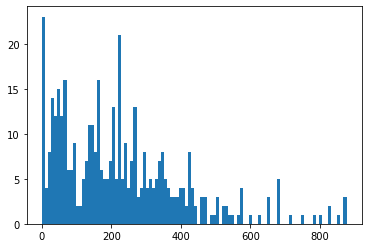

In [10]:
lengths = [len(x) for x in documents]
# histogram of lengths
import matplotlib.pyplot as plt
plt.hist(lengths, bins=100)
plt.show()


In [11]:
if 1 == 0:
    # THIS LINE COSTS MONEY TO RUN
    embeddings = get_embeddings(documents, "doc", model="curie")

In [12]:
# save embeddings to save_dir/embeddings.npy
np.save(os.path.join(save_dir, "embeddings.npy"), embeddings)

# save links to save_dir/links.npy
np.save(os.path.join(save_dir, "links.npy"), links)

# save documents to save_dir/documents.npy
np.save(os.path.join(save_dir, "documents.npy"), documents)

# save img_files to save_dir/img_files.npy
np.save(os.path.join(save_dir, "img_files.npy"), img_files)


In [8]:
print(len(links))
print(len(documents))
print(len(img_files))

356
356
356
